In [ ]:
pip install gingado

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.5 MB/s eta 0:00:00
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.6.4
    Uninstalling pydantic-2.6.4:
      Successfully uninstalled pydantic-2.6.4


In [ ]:
from gingado.datasets import load_CB_speeches

all_speeches = load_CB_speeches()

speeches_2023 = load_CB_speeches([2023])

In [ ]:
speeches_2023

,url,title,description,date,text,author
0,http://www.bis.org/review/r230110f.htm,Huw Pill: UK Monetary policy outlook,"Speech by Mr Huw Pill, Chief Economist and Exe...",2023-01-09 00:00:00,UK monetary policy outlook -\nspeech by Huw Pi...,Huw Pill
1,http://www.bis.org/review/r230110c.htm,Shaktikanta Das: South Asia's current macroeco...,"Keynote address by Mr Shaktikanta Das, Governo...",2023-01-06 00:00:00,Shaktikanta Das: South Asia's current macroeco...,Shaktikanta Das
2,http://www.bis.org/review/r230110b.htm,François Villeroy de Galhau: New Year wishes 2023,New Year wishes to the Paris financial centre ...,2023-01-05 00:00:00,François Villeroy de Galhau: New Year wishes ...,François Villeroy de Galhau
3,http://www.bis.org/review/r230110a.htm,Lisa D Cook: Thoughts on inflation in a supply...,"Speech by Ms Lisa D Cook, Member of the Board ...",2023-01-06 00:00:00,For release on delivery\n11:15 a.m. EST (10:15...,Lisa D Cook
4,http://www.bis.org/review/r230112b.htm,Claudia Buch: Central bank independence and th...,"Remarks by Prof Claudia Buch, Vice-President o...",2023-01-10 00:00:00,Central bank independence and the mandate - ev...,Claudia Buch
...,...,...,...,...,...,...
735,https://www.bis.org/review/r240105b.htm,Andriy Pyshnyy: Introductory speech - Workshop...,"Introductory speech by Mr Andriy Pyshnyy, Gove...",2023-12-15 00:00:00,Andriy Pyshnyy: Introductory speech - Workshop...,Andriy Pyshnyy
736,https://www.bis.org/review/r240105i.htm,Ben Broadbent: Signal versus noise,"Speech by Mr Ben Broadbent, Deputy Governor fo...",2023-12-18 00:00:00,Signal versus noise - speech\nby Ben Broadbent...,Ben Broadbent
737,https://www.bis.org/review/r240105h.htm,Sarah Breeden: Monetary policy as engineering?,"Speech by Ms Sarah Breeden, Deputy Governor an...",2023-12-19 00:00:00,Bank of England Page 1\n\nMonetary policy as\n...,Sarah Breeden
738,https://www.bis.org/review/r240105f.htm,Rajeshwar Rao: Innovations in banking - the em...,"Remarks (virtually) by Mr Rajeshwar Rao, Deput...",2023-12-22 00:00:00,Innovations in Banking - The emerging role for...,Rajeshwar Rao


In [ ]:
speeches_2023.columns

Index(['url', 'title', 'description', 'date', 'text', 'author'], dtype='object')

In [ ]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

                                         url  \
0     http://www.bis.org/review/r230110f.htm   
1     http://www.bis.org/review/r230110c.htm   
2     http://www.bis.org/review/r230110b.htm   
3     http://www.bis.org/review/r230110a.htm   
4     http://www.bis.org/review/r230112b.htm   
..                                       ...   
735  https://www.bis.org/review/r240105b.htm   
736  https://www.bis.org/review/r240105i.htm   
737  https://www.bis.org/review/r240105h.htm   
738  https://www.bis.org/review/r240105f.htm   
739  https://www.bis.org/review/r240105e.htm   

                                                 title  \
0                 Huw Pill: UK Monetary policy outlook   
1    Shaktikanta Das: South Asia's current macroeco...   
2    François Villeroy de Galhau: New Year wishes 2023   
3    Lisa D Cook: Thoughts on inflation in a supply...   
4    Claudia Buch: Central bank independence and th...   
..                                                 ...   
735  Andriy Pyshn

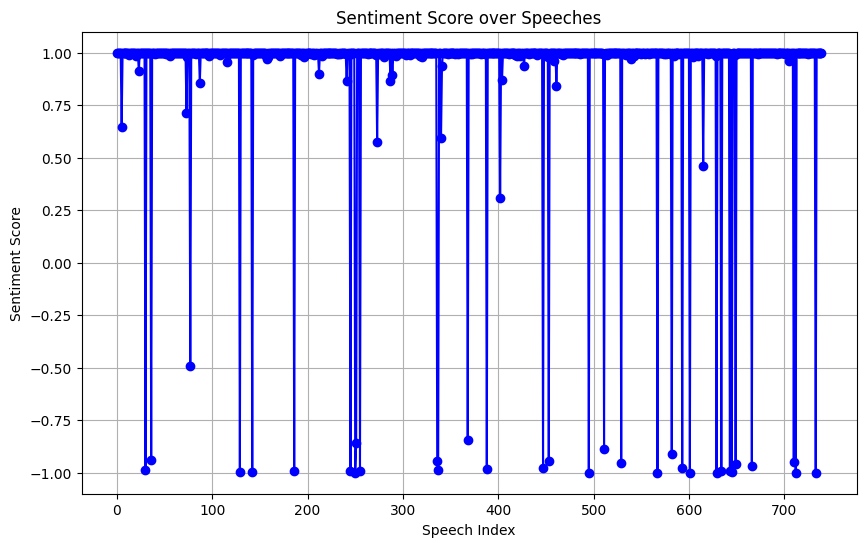

In [ ]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Initialise l'analyseur de sentiment VADER
sid = SentimentIntensityAnalyzer()

# Crée une liste pour stocker les scores de sentiment
sentiment_scores = []

# Itère sur les textes dans le DataFrame
for text in speeches_2023['text']:
    # Calcule le score de sentiment pour chaque texte à l'aide de VADER
    sentiment_score = sid.polarity_scores(text)['compound']
    sentiment_scores.append(sentiment_score)

# Crée une nouvelle colonne dans le DataFrame pour stocker les scores de sentiment
speeches_2023['Sentiment Score'] = sentiment_scores

# Affiche le DataFrame avec les scores de sentiment
print(speeches_2023)

# Trace les scores de sentiment sur un graphique
plt.figure(figsize=(10, 6))
plt.plot(speeches_2023.index, speeches_2023['Sentiment Score'], marker='o', linestyle='-', color='b')
plt.title('Sentiment Score over Speeches')
plt.xlabel('Speech Index')
plt.ylabel('Sentiment Score')
plt.grid(True)
plt.show()

